In [1]:
  import CAD_to_OpenMC.assembly as ab

In [3]:
a=ab.Assembly()
a.stp_files=["7pin.step"]
a.import_stp_files()
a.solids_to_h5m()

INFO: 7pin.step imported - scaling
Info    :  - Label 'Shapes/fuel' (3D)
Info    :  - Color (0.615686, 0.811765, 0.929412) (3D & Surfaces)
Info    :  - Label 'Shapes/fuel' (3D)
Info    :  - Color (0.647059, 0.647059, 0.647059) (3D & Surfaces)
Info    :  - Label 'Shapes/fuel' (3D)
Info    :  - Color (0.231373, 0.380392, 0.705882) (3D & Surfaces)
Info    :  - Label 'Shapes/fuel' (3D)
Info    :  - Color (0.917647, 0.917647, 0.917647) (3D & Surfaces)
Info    :  - Label 'Shapes/fuel' (3D)
Info    :  - Color (0.768627, 0.886275, 0.952941) (3D & Surfaces)
Info    :  - Label 'Shapes/fuel' (3D)
Info    :  - Color (0.972549, 0.529412, 0.00392157) (3D & Surfaces)
Info    :  - Label 'Shapes/fuel' (3D)
Info    :  - Color (0.498039, 0.498039, 0.498039) (3D & Surfaces)
Info    :  - Label 'Shapes/graphite' (3D)
Info    :  - Color (0.980392, 0.713725, 0.00392157) (3D & Surfaces)
Info    :  - Label 'Shapes/graphite' (3D)
Info    :  - Color (0.615686, 0.811765, 0.929412) (3D & Surfaces)
Info    :  - Labe

/home/dresden/NuclearBoy/nuclear-boy/lib/python3.10/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=40.
  warn(msg, IDWarning)
/home/dresden/NuclearBoy/nuclear-boy/lib/python3.10/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=41.
  warn(msg, IDWarning)
/home/dresden/NuclearBoy/nuclear-boy/lib/python3.10/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=42.
  warn(msg, IDWarning)


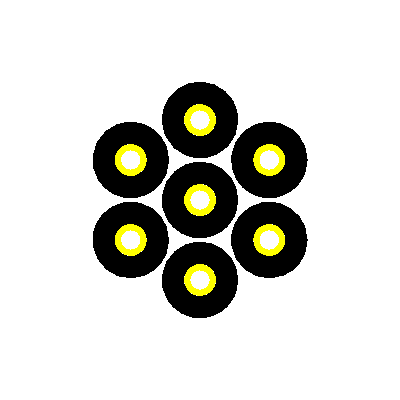

In [45]:
import openmc


from IPython.display import Image
from matplotlib import pyplot as plt
 # materials
u235 = openmc.Material(name="fuel")
u235.add_nuclide('U235', 1.0, 'ao')
u235.set_density('g/cc', 11)
u235.id = 40

water = openmc.Material(name="water")
water.add_nuclide('H1', 2.0, 'ao')
water.add_nuclide('O16', 1.0, 'ao')
water.set_density('g/cc', 1.0)
water.add_s_alpha_beta('c_H_in_H2O')
water.id = 41

graphite = openmc.Material(name="graphite")
graphite.add_nuclide('C12',1.0,'ao')
graphite.set_density('g/cc',2.26)
graphite.id = 42



materials = openmc.Materials([u235, water, graphite])
# makes use of the dagmc geometry
dag_univ = openmc.DAGMCUniverse("dagmc.h5m")

# creates an edge of universe boundary at a large radius
vac_surf = openmc.Sphere(r=10000, surface_id=9999, boundary_type="vacuum")

# specifies the region as below the universe boundary
region = -vac_surf

# creates a cell from the region and fills the cell with the dagmc geometry
containing_cell = openmc.Cell(cell_id=9999, region=region, fill=dag_univ)

model = openmc.Model()
model.geometry = openmc.Geometry(root=[containing_cell])

settings = openmc.Settings()
settings.batches = 100
settings.inactive = 2
settings.particles = 100000

model = openmc.Model(geometry=geometry, materials=materials, settings=settings)
model.export_to_model_xml()

p = openmc.Plot()
p.width = (25.0, 25.0)
p.pixels = (400, 400)
p.color_by = 'material'
p.colors = {u235: 'yellow', water: 'blue', graphite: 'black'}
openmc.plot_inline(p)